In [1]:
# import data
import torch
save_path = 'work_dir/irdrop_mavi/'

epoch = 400
model_out_path = f"../{save_path}/model_iters_{epoch}.pth"
checkpoint = torch.load(model_out_path)
state_dict = checkpoint['state_dict']


In [2]:
# key-value pair for each layer stored as intermediate result of training
print(state_dict.keys())

odict_keys(['inc.double_conv.0.weight', 'inc.double_conv.1.weight', 'inc.double_conv.1.bias', 'inc.double_conv.1.running_mean', 'inc.double_conv.1.running_var', 'inc.double_conv.1.num_batches_tracked', 'inc.double_conv.3.weight', 'inc.double_conv.4.weight', 'inc.double_conv.4.bias', 'inc.double_conv.4.running_mean', 'inc.double_conv.4.running_var', 'inc.double_conv.4.num_batches_tracked', 'down1.maxpool_conv.1.double_conv.0.weight', 'down1.maxpool_conv.1.double_conv.1.weight', 'down1.maxpool_conv.1.double_conv.1.bias', 'down1.maxpool_conv.1.double_conv.1.running_mean', 'down1.maxpool_conv.1.double_conv.1.running_var', 'down1.maxpool_conv.1.double_conv.1.num_batches_tracked', 'down1.maxpool_conv.1.double_conv.3.weight', 'down1.maxpool_conv.1.double_conv.4.weight', 'down1.maxpool_conv.1.double_conv.4.bias', 'down1.maxpool_conv.1.double_conv.4.running_mean', 'down1.maxpool_conv.1.double_conv.4.running_var', 'down1.maxpool_conv.1.double_conv.4.num_batches_tracked', 'down2.maxpool_conv.1.do

In [3]:
# find shape
for key, value in state_dict.items():
  print(f"Key: {key}, Value: {value.shape}")  # Print value shapes optionally

Key: inc.double_conv.0.weight, Value: torch.Size([64, 1, 3, 3, 3])
Key: inc.double_conv.1.weight, Value: torch.Size([64])
Key: inc.double_conv.1.bias, Value: torch.Size([64])
Key: inc.double_conv.1.running_mean, Value: torch.Size([64])
Key: inc.double_conv.1.running_var, Value: torch.Size([64])
Key: inc.double_conv.1.num_batches_tracked, Value: torch.Size([])
Key: inc.double_conv.3.weight, Value: torch.Size([64, 64, 3, 3, 3])
Key: inc.double_conv.4.weight, Value: torch.Size([64])
Key: inc.double_conv.4.bias, Value: torch.Size([64])
Key: inc.double_conv.4.running_mean, Value: torch.Size([64])
Key: inc.double_conv.4.running_var, Value: torch.Size([64])
Key: inc.double_conv.4.num_batches_tracked, Value: torch.Size([])
Key: down1.maxpool_conv.1.double_conv.0.weight, Value: torch.Size([128, 64, 3, 3, 3])
Key: down1.maxpool_conv.1.double_conv.1.weight, Value: torch.Size([128])
Key: down1.maxpool_conv.1.double_conv.1.bias, Value: torch.Size([128])
Key: down1.maxpool_conv.1.double_conv.1.runni

In [4]:
conv1_weights = state_dict['inc.double_conv.1.weight']


torch.Size([64, 1, 3, 3, 3])
reshaped_weights torch.Size([64, 1, 3, 3, 3])
reshaped_weights[0] torch.Size([1, 3, 3, 3])


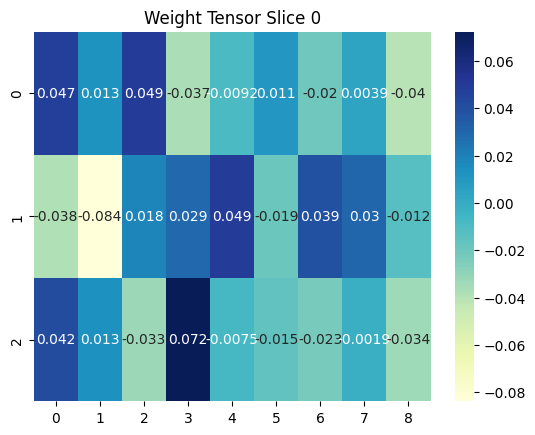

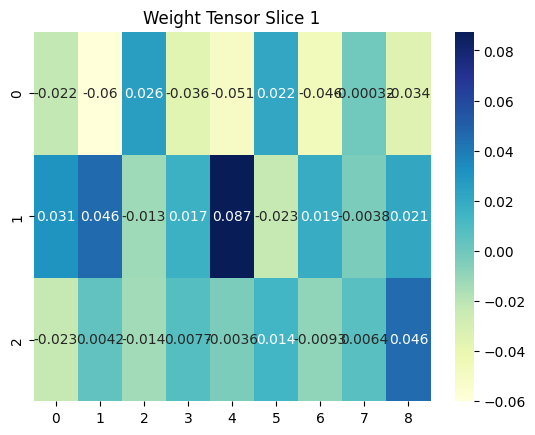

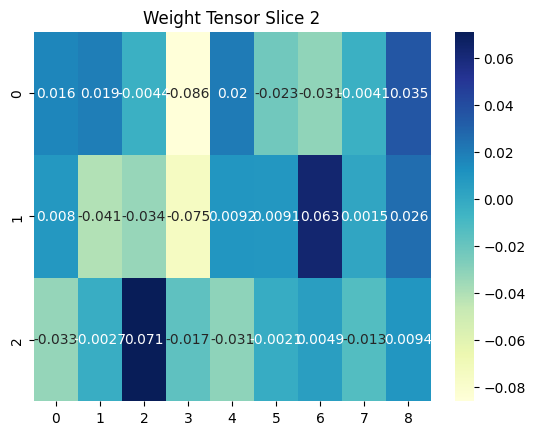

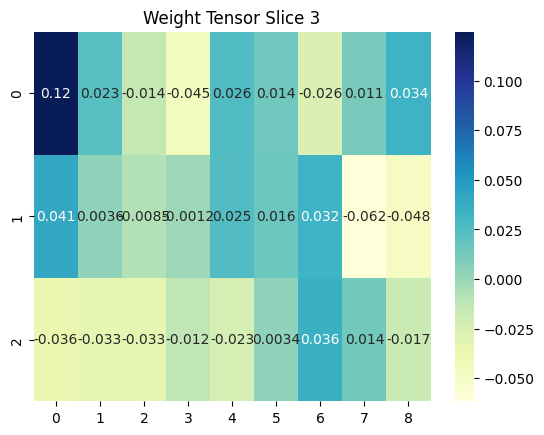

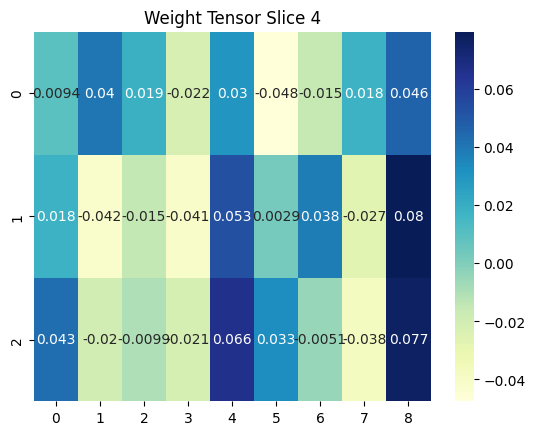

In [5]:
# visualize different slices in a layer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you loaded the state_dict and identified the key for weights
weight_tensor = state_dict['inc.double_conv.0.weight']
print(weight_tensor.shape)

# Reshape the weight tensor for heatmap visualization
num_filters, in_channels, kernel_h, kernel_w, kernel_d = weight_tensor.shape  # Consider 3D kernel

# Reshape to show individual filters (modify for all filters if desired)
reshaped_weights = weight_tensor.view(num_filters, -1, kernel_h, kernel_w, kernel_d)
print("reshaped_weights", weight_tensor.shape)
print("reshaped_weights[0]", weight_tensor[0].shape)

# Iterate over the first dimension (64)
for i in range(5):
    # Extract the 3D tensor at index i
    weight_3d = weight_tensor[i, 0, :, :, :]
    
    # Reshape the 3D tensor into a 2D array
    weight_2d = np.reshape(weight_3d, (3, 9))
    
    # Plot the 2D array using seaborn.heatmap()
    plt.figure()
    sns.heatmap(weight_2d, annot=True, cmap="YlGnBu")
    plt.title(f"Weight Tensor Slice {i}")
    plt.show()

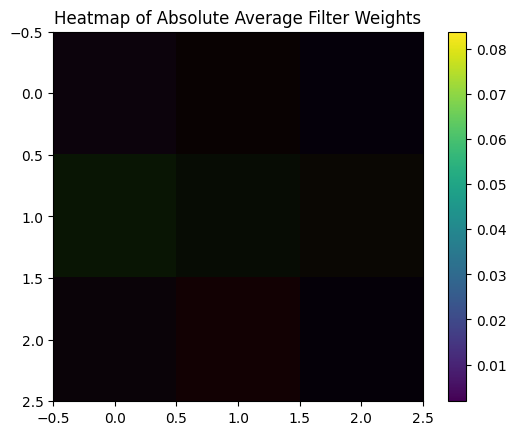

In [6]:
# visualize for average weights of one layer using sns.heatmap
import numpy as np
# Average weight
average_weights = weight_tensor.mean(dim=1)  # Average across input channels
reshaped_weights = average_weights.view(num_filters, kernel_h, kernel_w, kernel_d)

abs_weights = np.abs(reshaped_weights[0])
plt.imshow(abs_weights, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of Absolute Average Filter Weights')
plt.show()

torch.Size([64, 1, 3, 3, 3])


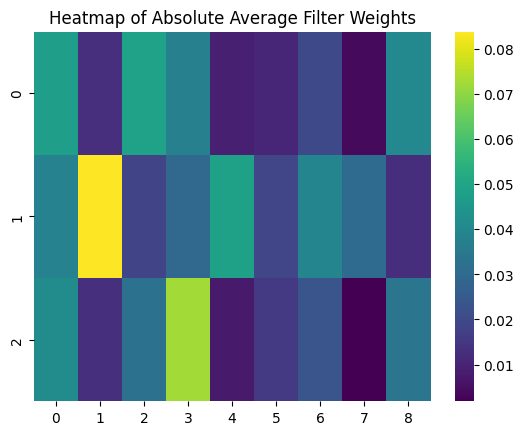

In [7]:
# visualize for average weights of one layer using sns.heatmap
weight_tensor = state_dict['inc.double_conv.0.weight']
print(weight_tensor.shape)

# Calculate average weight
num_filters, in_channels, kernel_h, kernel_w, kernel_d = weight_tensor.shape
average_weights = weight_tensor.mean(dim=1)  # Average across input channels

# Reshape for visualization
reshaped_weights = average_weights.view(num_filters, kernel_h, kernel_w, kernel_d)

# Select the first filter (or modify loop for all filters)
filter_slice = np.abs(reshaped_weights[0].cpu().numpy())  # Absolute value, convert to numpy
    # Reshape the 3D tensor into a 2D array
weight_2d = np.reshape(filter_slice, (3, 9))
# Create heatmap using seaborn
ax = sns.heatmap(weight_2d, cmap='viridis')  # Adjust cmap for different color schemes
ax.set_title('Heatmap of Absolute Average Filter Weights')
plt.show()

In [9]:
total_keys = len(state_dict)
last_10_keys = list(state_dict.keys())[total_keys-10:]

for key in last_10_keys:
  value = state_dict[key]
  print(f"Key: {key}, Value: {value.shape}")


Key: up3.conv.double_conv.1.running_var, Value: torch.Size([64])
Key: up3.conv.double_conv.1.num_batches_tracked, Value: torch.Size([])
Key: up3.conv.double_conv.3.weight, Value: torch.Size([64, 64, 3, 3])
Key: up3.conv.double_conv.4.weight, Value: torch.Size([64])
Key: up3.conv.double_conv.4.bias, Value: torch.Size([64])
Key: up3.conv.double_conv.4.running_mean, Value: torch.Size([64])
Key: up3.conv.double_conv.4.running_var, Value: torch.Size([64])
Key: up3.conv.double_conv.4.num_batches_tracked, Value: torch.Size([])
Key: outc.conv.weight, Value: torch.Size([4, 64, 1, 1])
Key: outc.conv.bias, Value: torch.Size([4])


In [ ]:
# Wrong! Saliency map should be calculated in training mode
from __future__ import print_function

import os
import os.path as osp
import json
import numpy as np

from tqdm import tqdm
import os
import sys

# Get the current working directory
current_dir = os.getcwd()

# Get the path to the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the parent directory to the Python path
sys.path.append(parent_dir)

from datasets.build_dataset import build_dataset
from utils.metrics import build_metric, build_roc_prc_metric
from models.build_model import build_model
from utils.configs import Parser

arg_dict = {'task': 'irdrop_mavi', 'save_path': '../work_dir/irdrop_mavi/', 'pretrained': '../work_dir/irdrop_mavi/model_iters_400.pth', 'max_iters': 1, 'plot_roc': True, 'arg_file': None, 'cpu': True, 'dataroot': '../CircuitNet-N28/training_set/IR_drop', 'ann_file_train': '../files/train_N28.csv', 'ann_file_test': '../files/test_N28.csv', 'dataset_type': 'IRDropDataset', 'batch_size': 2, 'model_type': 'MAVI', 'in_channels': 1, 'out_channels': 4, 'lr': 0.0002, 'weight_decay': 0.01, 'loss_type': 'L1Loss', 'eval_metric': ['NRMS', 'SSIM'], 'threshold': 0.9885, 'ann_file': '../files/test_N28.csv', 'test_mode': True}
print('===> Loading datasets')
# Initialize dataset
dataset = build_dataset(arg_dict)

print('===> Building model')
# Initialize model parameters
model = build_model(arg_dict)

if not arg_dict['cpu']:
    model = model.cuda()

# Build metrics
metrics = {k: build_metric(k) for k in arg_dict['eval_metric']}
avg_metrics = {k: 0 for k in arg_dict['eval_metric']}

count = 0

# Initialize a list to store gradients
gradients = []

with tqdm(total=len(dataset)) as bar:
    for feature, label, label_path in dataset:
        if arg_dict['cpu']:
            input, target = feature, label
        else:
            input, target = feature.cuda(), label.cuda()

        # Set requires_grad=True for the input
        input.requires_grad = True

        prediction = model(input)

        # Compute gradients
        prediction.backward(torch.ones_like(prediction))
        gradients.append(input.grad.cpu().numpy())
        print(gradients.shape)
        print(len(dataset))

        for metric, metric_func in metrics.items():
            if not metric_func(target.cpu(), prediction.squeeze(1).cpu()) == 1:
                avg_metrics[metric] += metric_func(target.cpu(), prediction.squeeze(1).cpu())

        if arg_dict['plot_roc']:
            save_path = osp.join(arg_dict['save_path'], 'test_result')
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            file_name = osp.splitext(osp.basename(label_path[0]))[0]
            save_path = osp.join(save_path, f'{file_name}.npy')
            output_final = prediction.float().detach().cpu().numpy()
            np.save(save_path, output_final)

        count += 1
        bar.update(1)

# Compute saliency map
saliency_map = np.mean(np.abs(gradients), axis=0)

# Visualize saliency map
plt.figure(figsize=(10, 8))
sns.heatmap(saliency_map, annot=False, cmap='viridis')
plt.title('Saliency Map')
plt.show()

for metric, avg_metric in avg_metrics.items():
    print("===> Avg. {}: {:.4f}".format(metric, avg_metric / len(dataset)))

# eval roc&prc
if arg_dict['plot_roc']:
    roc_metric, _ = build_roc_prc_metric(**arg_dict)
    print("\n===> AUC of ROC. {:.4f}".format(roc_metric))


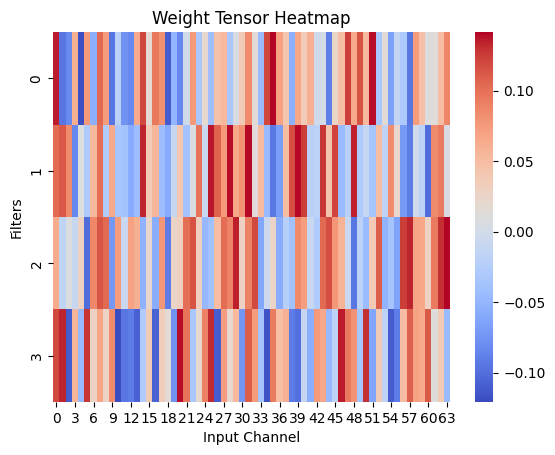

In [11]:
weight_tensor = state_dict['outc.conv.weight']  # Replace with key for desired layer
# Assuming weight_tensor is already retrieved from the state_dict
weight_tensor = weight_tensor.cpu().numpy()  # Move tensor to CPU if on GPU

# Reshape the weight tensor to a 2D array for visualization (assuming 64 filters)
weights_reshaped = weight_tensor.reshape(4, 64)  # Reshape based on filter count (64 in this case)

# Create a heatmap with Seaborn
sns.heatmap(weights_reshaped, cmap="coolwarm")  # Adjust cmap as desired

# Add labels and title
plt.xlabel("Input Channel")
plt.ylabel("Filters")
plt.title("Weight Tensor Heatmap")

# Show the heatmap
plt.show()


In [ ]:

# Set the path to the directory where the files are located
save_path = 'work_dir/irdrop_mavi/'

# Loop through all files in the directory
for filename in os.listdir(save_path):
    # Check if the file has the expected format
    if filename.startswith('down') and filename.endswith('.pth'):
        # Construct the full file path
        file_path = os.path.join(save_path, filename)
        
        # Load the tensor from the file
        tensor = torch.load(file_path)
        
        # Get the shape of the tensor
        tensor_shape = tensor.shape
        
        # Print the file name and tensor shape
        print(f"File: {filename}, Tensor shape: {tensor_shape}")